In [1]:
import yfinance as yf
import numpy as np
import numpy as np
from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# !pip install spectrum 
from spectrum.periodogram import speriodogram
pd.set_option('display.max_columns', None)

In [8]:
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
# gdp = pd.read_csv(r'/Users/brianlivian/Downloads/GDP Per Capita/GDP Per Capita.csv')
# gdp = gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'], axis = 1)
# gdp = pd.melt(gdp, id_vars = 'Country Name', var_name = 'Year', value_name = 'GDP')
# gdp.pivot(index = 'Year', columns = 'Country Name').reset_index().to_csv('GDP Pivoted.csv')

In [43]:
gdp = pd.read_csv(r'/Users/brianlivian/Desktop/GDP Cleaned.csv')
gdp = gdp.dropna(axis = 1)
gdp = gdp.set_index('Year')

In [44]:
gdp.head()

Africa Eastern and Southern  Africa Western and Central     Algeria  \
Year                                                                        
1960                   162.726325                  107.930722  246.303751   
1961                   162.555968                  113.080062  214.771980   
1962                   172.271022                  118.829461  172.242509   
1963                   199.784916                  123.441089  226.895450   
1964                   180.228774                  131.852423  238.043710   

        Australia      Austria  Bahamas, The  Bangladesh      Belgium  \
Year                                                                    
1960  1810.619230   935.460427   1550.267699   89.035239  1273.691659   
1961  1877.616638  1031.815004   1651.317673   97.595292  1350.197673   
1962  1854.656834  1087.834243   1752.840006  100.122130  1438.523233   
1963  1967.116537  1167.000532   1867.010351  101.901413  1535.023729   
1964  2131.377948  1269.412583   1994.440497  100.221104  1701.846276   

          Belize       Benin      Bermuda     Bolivia   Botswana      Brazil  \
Year                                                                           
1960  304.903860   93.022700  1902.402119  102.237722  60.493958  235.946883   
1961  316.413629   95.572232  1961.538169  109.061304  64.176140  232.480546   
1962  327.099997   94.464497  2020.385965  116.924968  68.050349  251.348317   
1963  336.938102   99.858918  2020.265247  123.429341  71.106439  295.631971   
1964  351.161126  104.339929  2199.727007  136.312362  75.955918  258.605371   

      Burkina Faso    Burundi    Cameroon       Canada  \
Year                                                     
1960     68.424734  70.051910  118.643145  2259.294285   
1961     71.558180  71.167188  123.514808  2240.433039   
1962     76.520549  73.435331  128.594637  2268.585346   
1963     78.372196  78.514621  130.175274  2374.498448   
1964     80.472718  86.161550  137.629764  2555.111146   

      Caribbean small states  Central African Republic        Chad  \
Year                                                                 
1960              448.256417                 74.687347  104.471719   
1961              476.901484                 80.688064  109.129251   
1962              494.736372                 80.212712  114.581807   
1963              516.739524                 81.917909  116.776544   
1964              547.950527                 88.290116  120.820655   

           Chile      China    Colombia  Congo, Dem. Rep.  Congo, Rep.  \
Year                                                                     
1960  505.349325  89.520542  251.041523        220.313990   129.370336   
1961  555.134403  75.805838  274.052264        197.391359   145.405979   
1962  638.945360  70.909412  289.917946        235.633524   155.738527   
1963  655.252249  74.313643  274.314958        377.429879   157.055866   
1964  678.128106  85.498555  328.655032        170.467005   165.009166   

      Costa Rica  Cote d'Ivoire  Dominican Republic  \
Year                                                  
1960  381.363682     155.899633          204.114871   
1961  355.002749     170.243050          192.027613   
1962  334.309249     171.128640          234.051629   
1963  344.354657     194.212530          258.595782   
1964  352.336885     226.227042          272.974800   

      Early-demographic dividend  East Asia & Pacific  \
Year                                                    
1960                  161.165351           148.423623   
1961                  158.406567           148.655534   
1962                  159.405809           149.662986   
1963                  165.129626           163.025364   
1964                  184.658198           182.711553   

      East Asia & Pacific (IDA & IBRD countries)  \
Year                                               
1960                                   91.941143   
1961                              

In [45]:
gdpPct = gdp.pct_change()
gdpPct = gdpPct.dropna()

In [182]:
countries = [
#              'Africa Eastern and Southern',  
#              'Africa Western and Central', 
#              'Caribbean small states',
#              'East Asia & Pacific', 
#              'Heavily indebted poor countries (HIPC)', 
#              'Latin America & Caribbean', 
#              'North America', 
             'United States',
             'China',
#              'World'
]
gdpSubset = gdp[countries]
gdpPctSubset = gdpPct[countries]

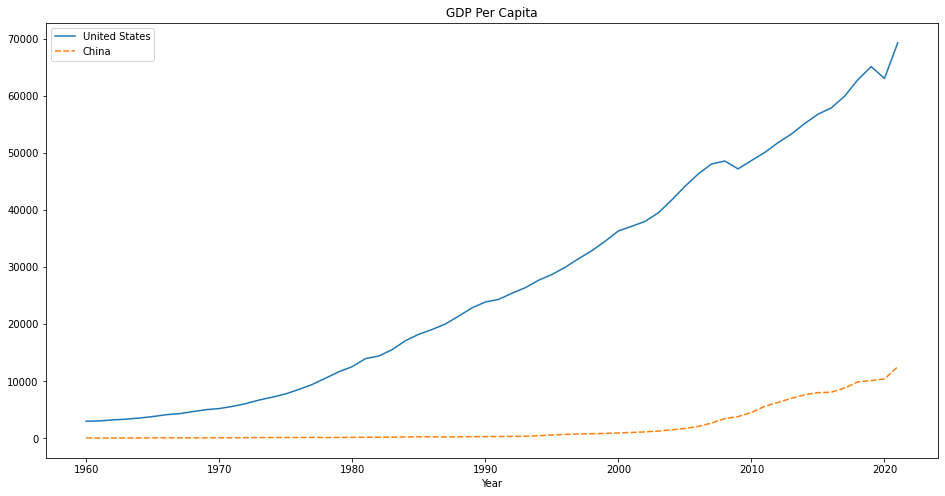

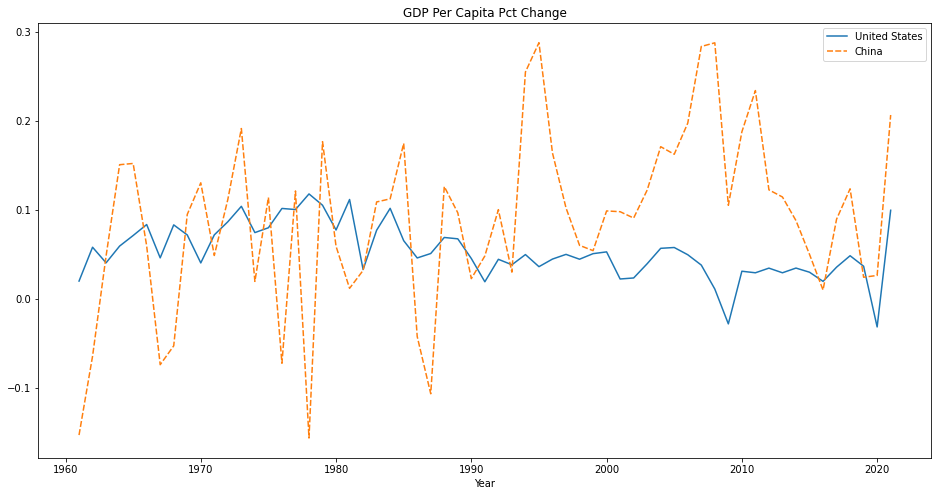

In [183]:
figure(figsize= (16,8))
sns.lineplot(data= gdpSubset)
plt.title('GDP Per Capita')
plt.show()

figure(figsize= (16,8))
sns.lineplot(data= gdpPctSubset)
plt.title('GDP Per Capita Pct Change')
plt.show()

In [184]:
window_size = 12
stride = 1
df = gdpPctSubset
X = df
y = df.index
SW = SlidingWindow(size=window_size, stride=stride)
X_sw, yr = SW.fit_transform_resample(X, y)

In [185]:
# Plot the persistence diagram and landscape for a random point cloud sliding window
from gtda.homology import VietorisRipsPersistence
pointcloud = X_sw[25]

vrp = VietorisRipsPersistence()
vrp.fit_transform_plot(pointcloud.reshape(1, *pointcloud.shape))
plt.show()

pl = PersistenceLandscape()
persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
landscapedata = pl.fit_transform(persistencediagram)
pl.plot(landscapedata, homology_dimensions = [1], plotly_params=None)

In [186]:
# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p.lower() == 'auc':
        for point in zip(tseq,landscapevalues):
            norms.append(np.trapz(landscapevalues, tseq))
    else: 
        for point in zip(tseq,landscapevalues):
            norms.append(np.linalg.norm(point, p))        
    return sum(norms)

In [187]:
# Calculate the norms for each of the windows in the multivariate sliding window

# Initialize empty list
Norms = np.empty(window_size)
Norms[:] = np.nan
Norms = list(Norms)
vrp = VietorisRipsPersistence()
pl = PersistenceLandscape()
for pointcloud in X_sw:
    persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
    landscapedata = pl.fit_transform(persistencediagram)
    tseq = Ftseq(persistencediagram[0])
    yvalues = landscapedata[0][1]
    Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gdpSubset['Norms'] = Norms
gdpSubset['Norms Normalized'] = scaler.fit_transform(np.array(gdpSubset['Norms']).reshape(-1, 1)).reshape(-1)
gdpSubset

United States         China     Norms  Norms Normalized
Year                                                         
1960    3007.123445     89.520542       NaN               NaN
1961    3066.562869     75.805838       NaN               NaN
1962    3243.843078     70.909412       NaN               NaN
1963    3374.515171     74.313643       NaN               NaN
1964    3573.941185     85.498555       NaN               NaN
...             ...           ...       ...               ...
2017   59914.777797   8816.986905  0.000000            0.0000
2018   62805.253758   9905.342004  0.000000            0.0000
2019   65094.799429  10143.838196  0.000000            0.0000
2020   63027.679527  10408.669756  0.000033            0.0315
2021   69287.536588  12556.333120  0.000000            0.0000

[62 rows x 4 columns]

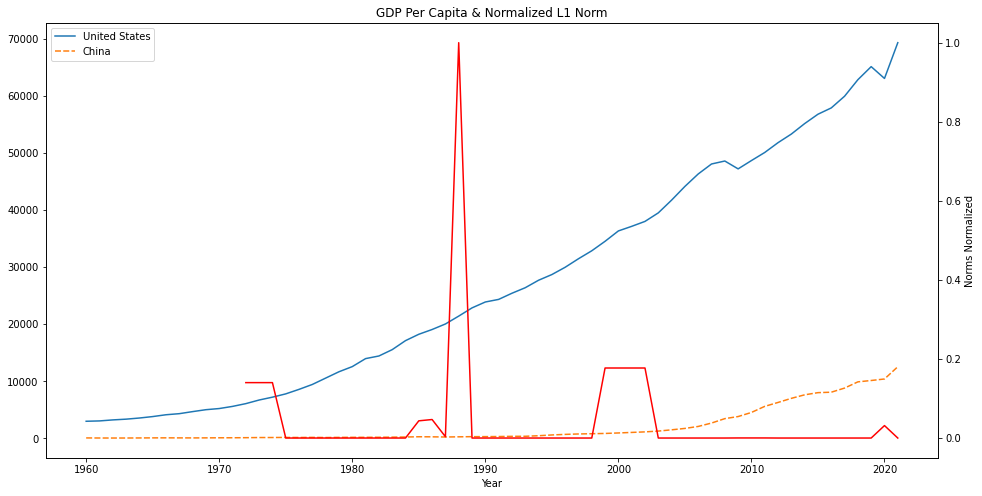

In [189]:
figure(figsize= (16,8))
sns.lineplot(data= gdpSubset.drop(['Norms', 'Norms Normalized'], axis = 1), legend = True)
ax2 = plt.twinx()
sns.lineplot(data= gdpSubset['Norms Normalized'], color="r", ax=ax2, legend = False)
plt.title('GDP Per Capita & Normalized L1 Norm')
plt.show()